In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos de los archivos proporcionados
cash_requests_path = '../project_dataset/extract - cash request - data analyst.csv'
fees_path = '../project_dataset/extract - fees - data analyst - .csv'
lexique_path = '../project_dataset/Lexique - Data Analyst.xlsx'

cash_requests_data = pd.read_csv(cash_requests_path)  # Cargar los datos de solicitudes de efectivo
fees_data = pd.read_csv(fees_path)                    # Cargar los datos de las comisiones
lexique_data = pd.read_excel(lexique_path)  

In [11]:
# Crear una copia del DataFrame original para mantener los datos originales intactos
modified_cash_requests_data = cash_requests_data.copy()

# Data Imputation Strategy for Cash Requests Dataset

This document outlines the method used for imputing missing values in the cash requests dataset, focusing on leveraging contextual information from multiple fields to provide meaningful replacements for missing data.

## Overview

To address missing data within the dataset, we've developed a strategy that utilizes the combination of `status` and `transfer_type` fields. This approach ensures that the imputed values retain a sense of the original data's context, improving the quality of the dataset for further analysis.

## Step-by-Step Imputation Process

1. **Combining Fields for Fill Values**

    Firstly, we create a new column named `fill_value` that combines the `status` and `transfer_type` of each transaction. This combination provides a unique, contextual string for each record, which will be used to fill missing values in multiple columns.

    ```python
    modified_cash_requests_data['fill_value'] = modified_cash_requests_data['status'] + "_" + modified_cash_requests_data['transfer_type']
    ```

2. **Imputation of Specific Fields**

    - **Cash Request Received Date:** For entries missing the `cash_request_received_date`, the fill value reflects both the `status` and `transfer_type`, indicating why the date might be missing, such as a transaction being declined.

        ```python
        modified_cash_requests_data.loc[modified_cash_requests_data['cash_request_received_date'].isnull(), 'cash_request_received_date'] = modified_cash_requests_data['fill_value']
        ```

    - **Money Back Date:** Missing entries in the `money_back_date` are filled using the same combined string, aiding in understanding scenarios where money might not have been returned.

        ```python
        modified_cash_requests_data.loc[modified_cash_requests_data['money_back_date'].isnull(), 'money_back_date'] = modified_cash_requests_data['fill_value']
        ```

    - **Moderation Status:** The `moderated_at` field for entries lacking details about moderation is filled with the `fill_value`, again providing context that includes both the `status` and type of transfer.

        ```python
        modified_cash_requests_data.loc[modified_cash_requests_data['moderated_at'].isnull(), 'moderated_at'] = modified_cash_requests_data['fill_value']
        ```

3. **Handling Specific Cases**

    For specific statuses, more precisely tailored fill values are used:

    ```python
    modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'transaction_declined', 'cash_request_received_date'] = 'transaction_declined_transaction'
    modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'money_back_date'] = 'rejected_transaction'
    modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'moderated_at'] = 'rejected_transaction'
    modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'canceled', 'moderated_at'] = 'canceled_transaction'
    ```

4. **User ID Imputation**

    Where `user_id` is missing, it is filled using the `deleted_account_id` to maintain record integrity:

    ```python
    modified_cash_requests_data['user_id'].fillna(modified_cash_requests_data['deleted_account_id'], inplace=True)
    ```

5. **Cleanup**

    After all modifications, the temporary `fill_value` column is removed to clean up the DataFrame:

    ```python
    del modified_cash_requests_data['fill_value']
    ```


In [12]:
# Combinando status y transfer_type para usarlo como valor de relleno donde sea necesario
modified_cash_requests_data['fill_value'] = modified_cash_requests_data['status'] + "_" + modified_cash_requests_data['transfer_type']

# Llenar Cash_request_received_date para casos específicos con combinación de status y transfer_type
modified_cash_requests_data.loc[modified_cash_requests_data['cash_request_received_date'].isnull(), 'cash_request_received_date'] = modified_cash_requests_data['fill_value']

# Llenar Money_back_date para casos específicos con combinación de status y transfer_type
modified_cash_requests_data.loc[modified_cash_requests_data['money_back_date'].isnull(), 'money_back_date'] = modified_cash_requests_data['fill_value']

# Llenar moderated_at para casos específicos con combinación de status y transfer_type
modified_cash_requests_data.loc[modified_cash_requests_data['moderated_at'].isnull(), 'moderated_at'] = modified_cash_requests_data['fill_value']

# Ejemplos específicos mencionados anteriormente
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'transaction_declined', 'cash_request_received_date'] = 'transaction_declined_transaction'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'money_back_date'] = 'rejected_transaction'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'moderated_at'] = 'rejected_transaction'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'canceled', 'moderated_at'] = 'canceled_transaction'

# Llenar user_id con el valor de deleted_account_id donde user_id es nulo
modified_cash_requests_data['user_id'].fillna(modified_cash_requests_data['deleted_account_id'], inplace=True)

# Eliminando la columna temporal 'fill_value'
del modified_cash_requests_data['fill_value']

# Mostrar las primeras filas del DataFrame modificado para confirmar los cambios
print(modified_cash_requests_data.head())

     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id          moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  rejected_transaction   
1  2019-12-11 14:24:22.900054+00    231.0  rejected_transaction   
2  2019-12-11 09:46:59.779773+00    191.0  rejected_transaction   
3  2019-12-18 14:26:18.136163+00    761.0  rejected_transaction   
4   2020-05-07 09:21:55.34008+00   7686.0  rejected_transaction   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2                 NaN  2020-01-09 19:13:35.825041+00   
3           

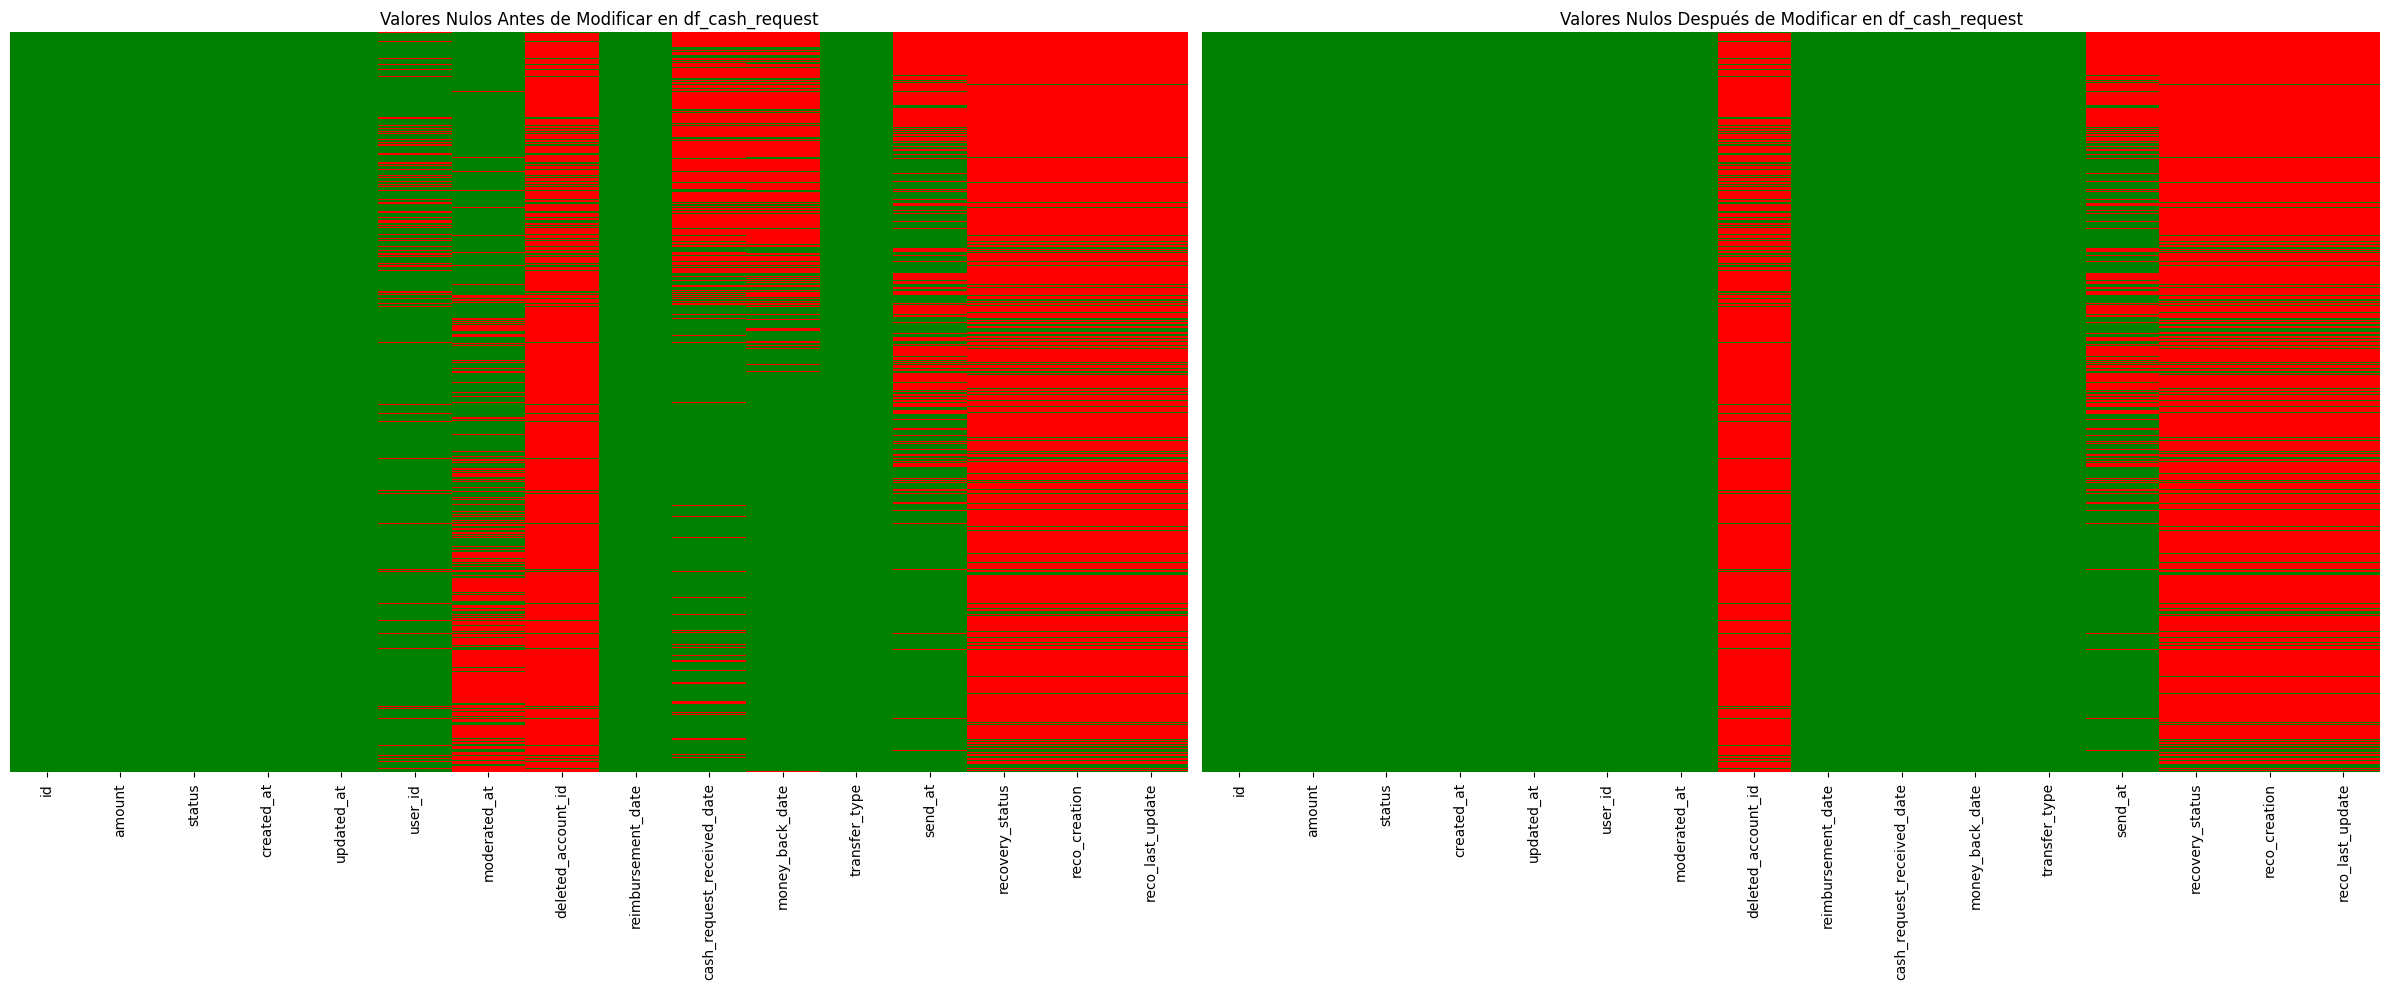

In [13]:
# Definir un mapa de colores personalizado para la visualización de nulos
colors = ["green", "red"]  # Verde para valores no nulos, rojo para nulos
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

plt.figure(figsize=(24, 10))  # Ajusta el tamaño según tus necesidades

# Gráfico de calor para el DataFrame de solicitudes de efectivo original
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.heatmap(cash_requests_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Antes de Modificar en df_cash_request')

# Gráfico de calor para el DataFrame de solicitudes de efectivo modificado
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.heatmap(modified_cash_requests_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Después de Modificar en df_cash_request')

plt.tight_layout()
plt.show()

In [19]:
# Ruta donde se guardará el archivo CSV
cleaned_dataset_path = '../cleaned_dataset/modified_cash_requests_data.csv'

# Guardar el DataFrame modificado como CSV
modified_cash_requests_data.to_csv(cleaned_dataset_path, index=False)

print("El conjunto de datos modificado ha sido guardado exitosamente como 'modified_cash_requests_data.csv' en la carpeta 'cleaned_dataset'.")

El conjunto de datos modificado ha sido guardado exitosamente como 'modified_cash_requests_data.csv' en la carpeta 'cleaned_dataset'.


# Data Imputation Strategy for Fees Dataset

This document outlines the method used for imputing missing values in the fees dataset, focusing on leveraging contextual information from the `type`, `status`, and `category` fields to provide meaningful replacements for missing data.

## Overview

To address the issue of missing data within the fees dataset, we've implemented a strategy that leverages information from related fields such as `type` and `category`. This approach helps ensure that the imputed values are not only contextually appropriate but also enhance the dataset's usability for subsequent analyses.

## Step-by-Step Imputation Process

1. **Handling Dates for Specific Fee Types**

   We observed that date fields like `from_date` and `to_date` were not applicable to all fee types. Therefore, we strategically filled these fields only where relevant:

   - **`instant_payment` and `incident`:**
     These fee types do not require `from_date` and `to_date` information. Thus, we filled these fields with "no applicable" to clarify their non-relevance.

     ```python
     conditions_from_to_date = (modified_fees_data['type'].isin(['instant_payment', 'incident']))
     modified_fees_data.loc[conditions_from_to_date, ['from_date', 'to_date']] = 'not applicable'
     ```

2. **Category Field Adjustments**

   The `category` field had missing values, especially for the `postpone` type, where it seemed contextually incorrect to have empty entries. We addressed these by setting a default value:

   - **For `postpone`:**
     Since this fee type typically should have a category defined, we filled missing values with "not applicable".

     ```python
     conditions_category = (modified_fees_data['type'] == 'postpone')
     modified_fees_data.loc[conditions_category, 'category'] = 'not applicable'
     ```

   - **For other types where category is irrelevant:**
     Similar adjustments were made to ensure clarity and relevance.

     ```python
     conditions_category_non_incident = (~modified_fees_data['type'].isin(['incident']) & modified_fees_data['category'].isnull())
     modified_fees_data.loc[conditions_category_non_incident, 'category'] = 'not applicable'
     ```

3. **Visual Inspection of Imputation Results**

   Before finalizing the imputations, we visually inspected the changes using heatmaps to compare the presence of null values before and after the modifications:

   ```python
   import matplotlib.pyplot as plt
   import seaborn as sns
   from matplotlib.colors import LinearSegmentedColormap

   colors = ["green", "red"]  # Green for non-null, red for nulls
   cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

   plt.figure(figsize=(24, 10))
   plt.subplot(1, 2, 1)
   sns.heatmap(fees_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
   plt.title('Null Values Before Modification in fees_data')

   plt.subplot(1, 2, 2)
   sns.heatmap(modified_fees_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
   plt.title('Null Values After Modification in modified_fees_data')

   plt.tight_layout()
   plt.show()


In [20]:
# Crear una copia del DataFrame original para mantener los datos originales intactos
modified_fees_data = fees_data.copy()

# Rellenar 'from_date' y 'to_date' como 'no aplicable' para 'instant_payment', 'incident', y categorías específicas de 'category'
conditions_from_to_date = (modified_fees_data['type'].isin(['instant_payment', 'incident']) |
                           modified_fees_data['category'].isin(['rejected_direct_debit', 'month_delay_on_payment']))
modified_fees_data.loc[conditions_from_to_date, ['from_date', 'to_date']] = 'no aplicable'

# Rellenar 'category' para 'postpone' y tipos que no son 'incident' como 'no aplicable'
conditions_category_postpone = (modified_fees_data['type'] == 'postpone')
conditions_category_non_incident = (~modified_fees_data['type'].isin(['incident']) & modified_fees_data['category'].isnull())
modified_fees_data.loc[conditions_category_postpone | conditions_category_non_incident, 'category'] = 'no aplicable'

# Mostrar las primeras filas del DataFrame modificado para confirmar los cambios
print(modified_fees_data.head())

      id  cash_request_id             type    status               category  \
0   6537          14941.0  instant_payment  rejected           no aplicable   
1   6961          11714.0         incident  accepted  rejected_direct_debit   
2  16296          23371.0  instant_payment  accepted           no aplicable   
3  20775          26772.0  instant_payment  accepted           no aplicable   
4  11242          19350.0  instant_payment  accepted           no aplicable   

   total_amount                              reason  \
0           5.0  Instant Payment Cash Request 14941   
1           5.0               rejected direct debit   
2           5.0  Instant Payment Cash Request 23371   
3           5.0  Instant Payment Cash Request 26772   
4           5.0  Instant Payment Cash Request 19350   

                      created_at                     updated_at  \
0   2020-09-07 10:47:27.42315+00  2020-10-13 14:25:09.396112+00   
1  2020-09-09 20:51:17.998653+00  2020-10-13 14:25:15.537063

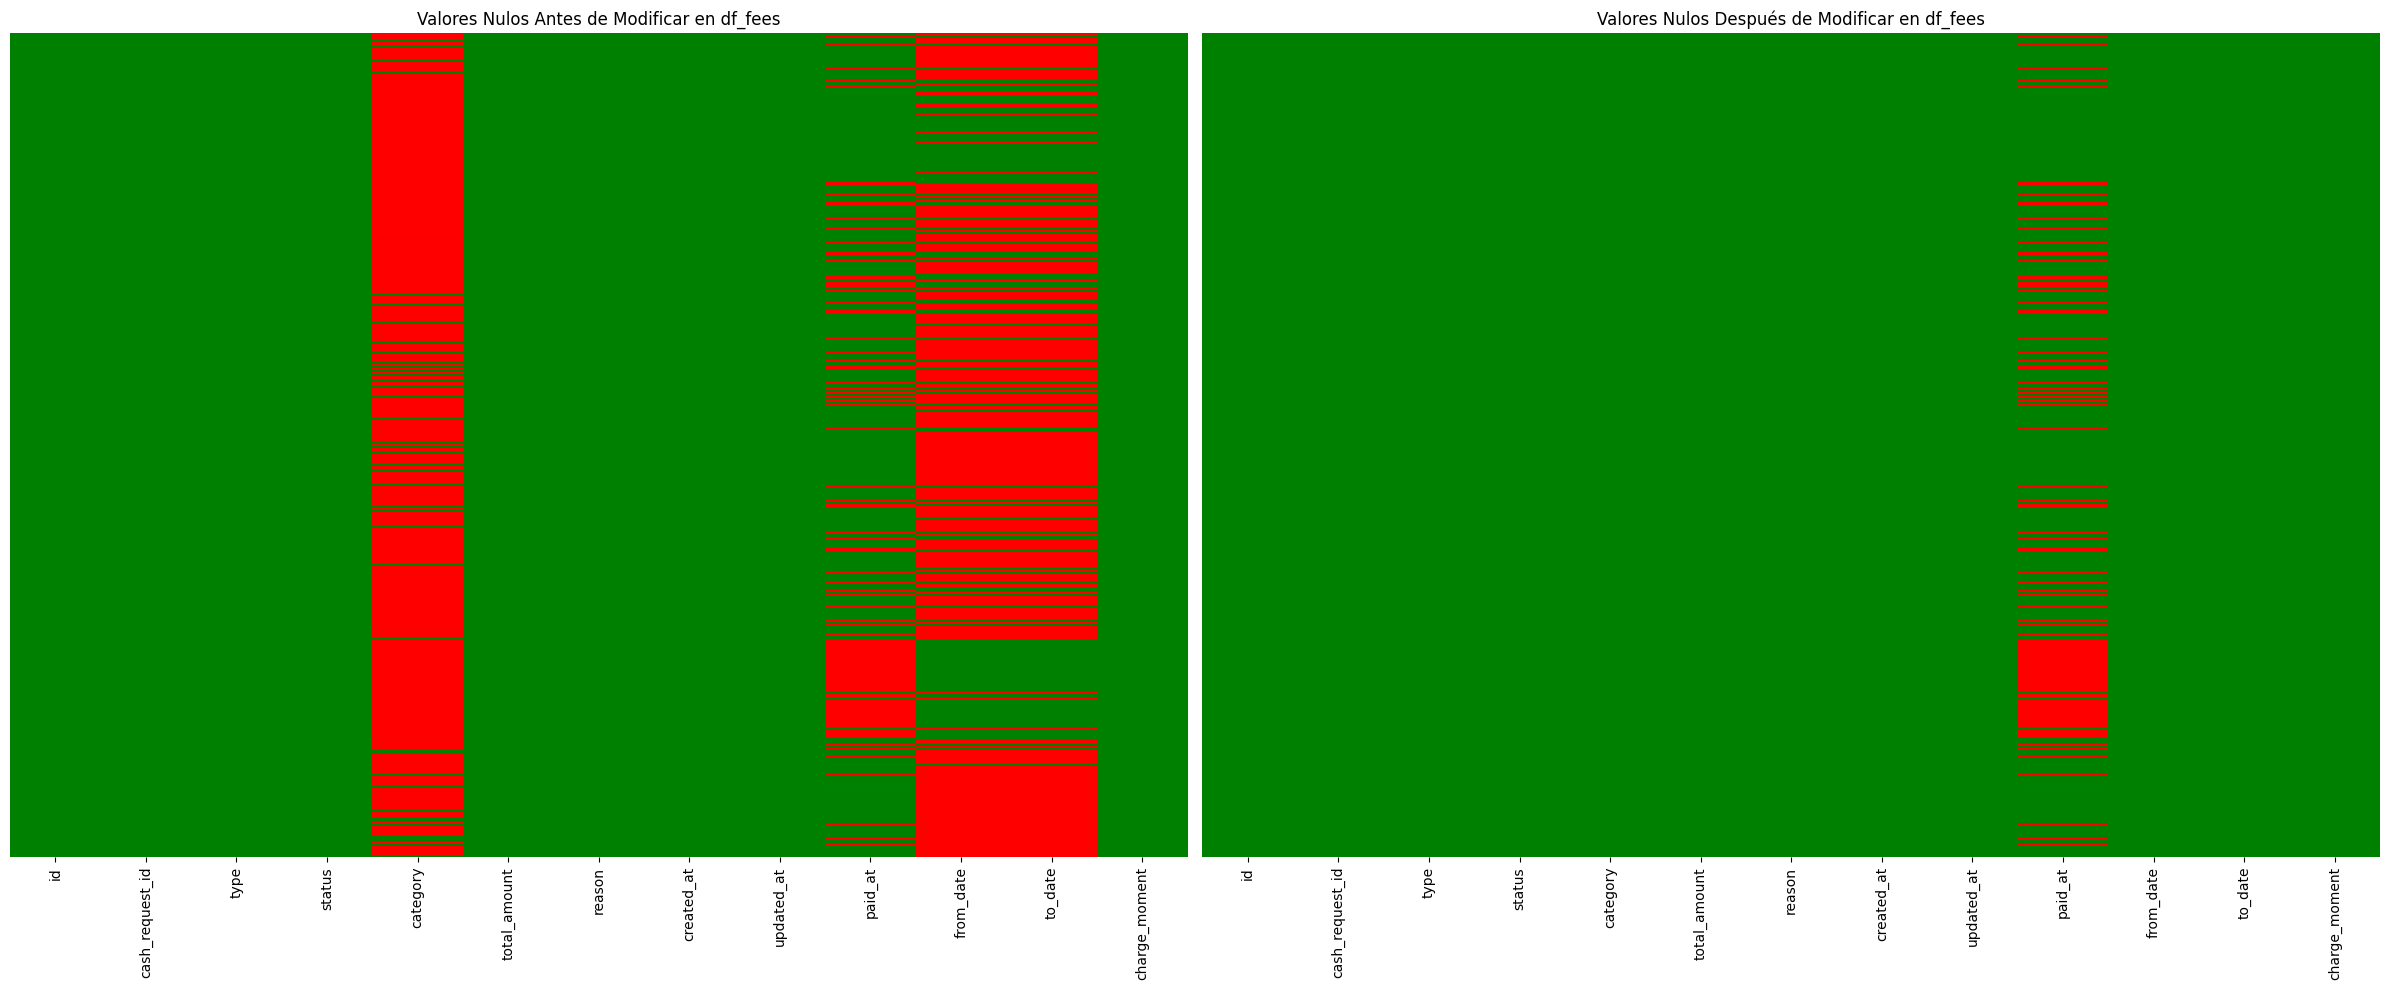

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Definir un mapa de colores personalizado para la visualización de nulos
colors = ["green", "red"]  # Verde para valores no nulos, rojo para nulos
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

plt.figure(figsize=(24, 10))  # Ajusta el tamaño según tus necesidades

# Gráfico de calor para el DataFrame de tarifas original
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.heatmap(fees_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Antes de Modificar en df_fees')

# Gráfico de calor para el DataFrame de tarifas modificado
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.heatmap(modified_fees_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Después de Modificar en df_fees')

plt.tight_layout()
plt.show()

In [22]:
import os

# Ruta donde se guardará el archivo CSV
cleaned_dataset_path = '../cleaned_dataset/modified_fees_data.csv'

# Guardar el DataFrame modificado como CSV
modified_fees_data.to_csv(cleaned_dataset_path, index=False)

print("El conjunto de datos modificado ha sido guardado exitosamente como 'modified_fees_data.csv' en la carpeta 'cleaned_dataset'.")

El conjunto de datos modificado ha sido guardado exitosamente como 'modified_fees_data.csv' en la carpeta 'cleaned_dataset'.
